# [Blog home](http://rajeshrinet.github.io/blog)
$$
$$

## Solving ordinary differential equations

Differential equations are ubiquitous in physics. Also, in many interesting cases they are not tractable analytically. So we take recourse to numerical methods, every now and then, to solve these differential equations. In this talk we will discuss some basics of solving ODEs on the computer. 



### Euler method

Consider a differential equation,

$$x' = -kx$$   

for $k>0$, the explicit Euler for  a step size $h$ is,

$$ x_{n+1} = x_{n} + h x'_{n} = (1-kh) x_{n} $$

The local truncation error in this case is $\mathcal{O}(h^2)$, while the total accumulated error is $\mathcal{O}(h)$. This is because of the discretization as the total number of steps goes as $1/h$ while each step incurs an error $\mathcal{O}(h^2)$. The method is called explicit as new value $y_{n+1}$ is given explicitly in terms of old value $y_n$. 


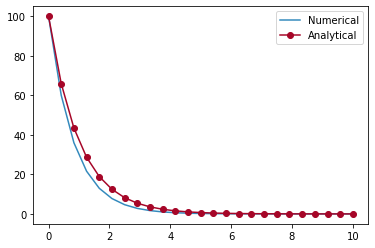

In [1]:
## Euler demo, k = 1, h = .4
import numpy as np
import matplotlib.pyplot as plt

## integration paramters
t0, tf, N = 0, 10, 25
h = (tf-t0)/N

# initialisation
t = np.linspace(t0, tf, N)
x = np.zeros(N)
k = 1
x[0] = 100
np.size(x)
np.size(t)
for tt in range(N-1):
    x[tt+1] = x[tt]*(1-k*h)
    
plt.plot(t, x, color="#348ABD")
plt.plot(t, 100*np.exp(-k*t), 'o-', color="#A60628")
plt.legend(["Numerical", "Analytical"], loc=1)

#### Unstable Solutions:
As can be seen from the update equation, this explicit method is unstable for $h>2/k$.
The behaviour at both $h=2/k$ and $h>2/k$ can be seen below. So we see the choice of step size is very important- a large choice of $h$ can give you a spurious result while if you choose $h$ to be very small then you may take a long long time to finish your integration. This problem is circumvented by using  $adaptive~stepsize~$ techiniques. These methods are computationally very efficient. We will talk about them, later in the talk.

(-110.0, 110.0)

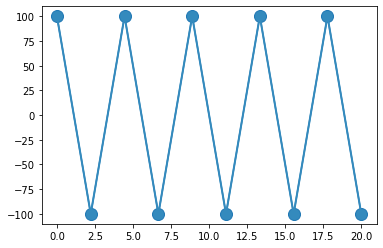

In [2]:
## Intersting oscillatory plot, h = 10/20, k = 1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## integration paramters
t0, tf, N = 0, 20, 10
h = (tf-t0)/N

# initialisation
t = np.linspace(t0, tf, N)
x = np.zeros(N)
k = 1
x[0] = 100
np.size(x)
np.size(t)
for tt in range(N-1):
    x[tt+1] = x[tt]*(1-k*h)
    
plt.plot(t, x,marker='o', markerfacecolor="#348ABD", markersize=12, )
plt.plot(t, x, 'b' , color="#348ABD", linewidth=2)

plt.ylim([-110, 110])

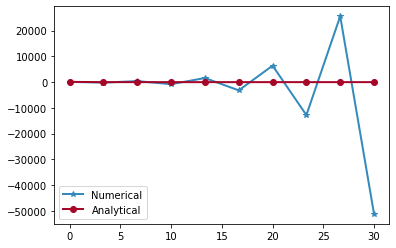

In [3]:
## Oscillatory diverging, h = 30/10, k = 1
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## integration paramters
t0, tf, N = 0, 30, 10
h = (tf-t0)/N

# initialisation
t = np.linspace(t0, tf, N)
x = np.zeros(N)
k = 1
x[0] = 100
np.size(x)
np.size(t)
for tt in range(N-1):
    x[tt+1] = x[tt]*(1-k*h)
    
plt.plot(t, x, '*-', color="#348ABD", linewidth=2)
plt.plot(t, 100*np.exp(-k*t), 'o-', color="#A60628", linewidth=2)
plt.legend(["Numerical", "Analytical"], loc=3)

#### Solution: Use implicit solvers
The implicit method solves the equation in terms of the current state of the system and the later one!

$$ x_{n+1} = x_n + h x'_{n+1} $$

$$ x_{n+1} = \frac{x_n}{1+kh} $$

is stable for arbitrary large $k$. 

### Adaptive solvers
All of the methods described above fall into category of fixed time step integrator. Fixed time step integrators are good to learn and practice, but there is a whole new set of algorithms which are more useful than this. These are called adaptive step integrators. There are little non-trivila to code but one can use readymade codes, easily available! You can think of fixed step integrations as Riemann sum while adaptive step integation are more like Lebesgue integral. If suppose your
problem is stiff then adaptive step integrators are the way to go. In general it is a good idea to use adaptive step integrator as this can accelerate your computational speed by making smart variable choice of step size. In the examples below we use adaptive step integrators.

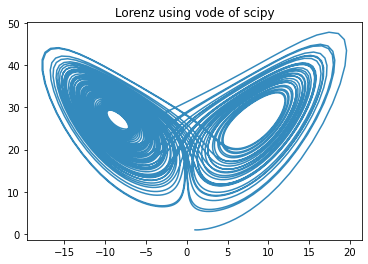

In [4]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
from scipy.integrate import ode

class param:
    sigma = 10.
    beta  = 8./3
    rho   = 28.0
## the function using ode integrator of scipy
def lorenz(t, rp):
    """Compute the time-derivative of a Lorentz system."""
    cx = ([param.sigma * (rp[  1] - rp[  0]), rp[  0] * (param.rho - rp[  2]) - rp[  1], rp[  0] * rp[  1] - param.beta * rp[  2]])
    return cx

# Ode integrator
backend = 'vode'
solver = ode(lorenz).set_integrator(backend, method='bdf', order=15, atol=1e-6)
rp0 = ([1.0, 1.0, 1.0]) # starting function
solver.set_initial_value(rp0, 0)
T = 60
dt = T/5000.
rp = []; t = []
while solver.successful() and solver.t <= T:
    solver.integrate(solver.t + dt)
    rp.append(solver.y); t.append(solver.t)
    
# Plotting Business   
rp = np.array(rp)
figure()
plot(rp[:,  0], rp[:,  2], color="#348ABD")
title("Lorenz using vode of scipy")
show() 


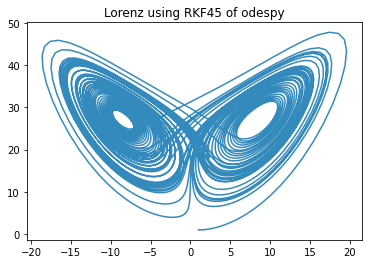

In [5]:
## the function using odespy
%matplotlib inline
import numpy as np
from matplotlib.pyplot import *
import odespy


class param:
    sigma = 10.
    beta  = 8./3
    rho   = 28.0


def lorenz(rp, t):
    """Compute the time-derivative of a Lorentz system."""
    cx = ([param.sigma * (rp[  1] - rp[  0]), rp[  0] * (param.rho - rp[  2]) - rp[  1], rp[  0] * rp[  1] - param.beta * rp[  2]])
    return cx
#
#
rp0 = np.array([1.0, 1.0, 1.0]) # starting function
rp0 = rp0.flatten()

T = 60 # end of simulation
N = 5000 # no of time steps
time_points = np.linspace(0, T, N+1)
solver = odespy.RK4(lorenz)
solver.set_initial_condition(rp0)
u, t = solver.solve(time_points)

# plotting business

figure()
plot(u[:,  0], u[:,  2], color="#348ABD")
title("Lorenz using RKF45 of odespy")
show() 

No handles with labels found to put in legend.


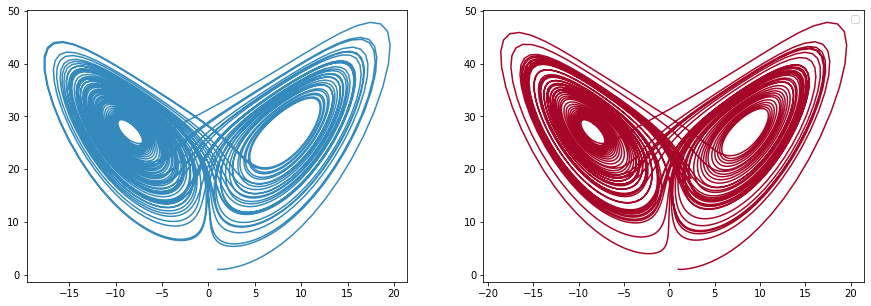

In [6]:
# Using odespy and scipy's vode for integration
#
#

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
import odespy

class param:
    sigma = 10.
    beta  = 8./3
    rho   = 28.0
## the function using ode integrator of scipy
def lorenz(t, rp):
    """Compute the time-derivative of a Lorentz system."""
    cx = ([param.sigma * (rp[  1] - rp[  0]), rp[  0] * (param.rho - rp[  2]) - rp[  1], rp[  0] * rp[  1] - param.beta * rp[  2]])
    return cx

# Ode integrator
backend = 'vode'
solver = ode(lorenz).set_integrator(backend, method='bdf', order=15, atol=1e-6)
rp0 = ([1.0, 1.0, 1.0]) # starting function
solver.set_initial_value(rp0, 0)
T = 60
dt = T/5000.
rp = []; t = []
while solver.successful() and solver.t <= T:
    solver.integrate(solver.t + dt)
    rp.append(solver.y); t.append(solver.t)
    
# Plotting Business   
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

rp = np.array(rp)
ax1.plot(rp[:,  0], rp[:,  2],color="#348ABD", label="Lorenz using vode of scipy" )
leg = plt.legend(loc="upper right")

## the function using odespy
def lorenz(rp, t):
    """Compute the time-derivative of a Lorentz system."""
    cx = ([param.sigma * (rp[  1] - rp[  0]), rp[  0] * (param.rho - rp[  2]) - rp[  1], rp[  0] * rp[  1] - param.beta * rp[  2]])
    return cx
#
#
rp0 = np.array([1.0, 1.0, 1.0]) # starting function
rp0 = rp0.flatten()

T = 60 # end of simulation
N = 5000 # no of time steps
time_points = np.linspace(0, T, N+1)
solver = odespy.RK4(lorenz)
solver.set_initial_condition(rp0)
u, t = solver.solve(time_points)

# plotting business
ax2.plot(u[:,  0], u[:,  2],  color="#A60628")
#title("Lorenz using RKF45 of odespy")
plt.show()

In [7]:
# to know more uncomment the line below
#help(odespy)

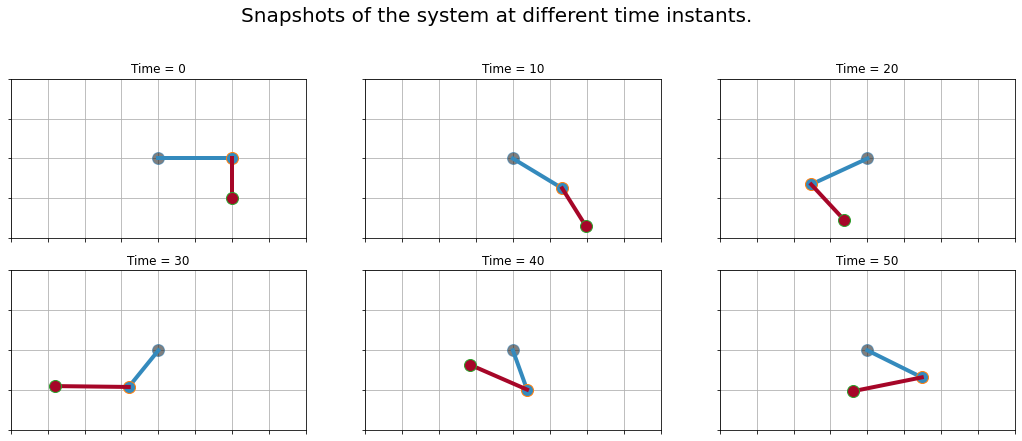

In [8]:
# Double pendulum 
import odespy
import scipy.io as sio

m1, m2 = 1, 1     # masses of pendulums
l1, l2 = 1, 1     # lengths of pendulums
g  = 9.8
mt = m1 + m2
dydx = np.zeros((4))		#size of array 4 with all elements zero


def DoublePendulum(rp, t):

    dydx[0] = rp[2]
    dydx[1] = rp[3]
    cs = np.cos(rp[1]-rp[0])
    sn = np.sin(rp[1]-rp[0])
    
    den1 = mt*l1 - m2*l1*cs*cs
    dydx[2] = ( m2*l1*rp[2]*rp[2]*sn*cs + m2*g*np.sin(rp[1])*cs + m2*l2*rp[3]*rp[3]*sn - mt*g*np.sin(rp[0]))/den1

    den2 = (l2/l1)*den1
    dydx[3] = ( -m2*l2*rp[3]*rp[3]*sn*cs + mt*( g*np.sin(rp[0])*cs - l1*rp[2]*rp[2]*sn - g*np.sin(rp[1]) )  )/den2

    return dydx


# Setting the initial condition
rp0 = np.zeros((4))     # initial \thetas and angular velocities
rp0[0] = np.pi/2
rp0[1] = 0#.1*np.pi
#rp0[2] = 5*np.pi/2
#rp0[3] = 2

T = 40				    # end of simulation
N = 1000 				# no of time steps
time_points = np.linspace(0, T, N+1)
solver = odespy.RK4(DoublePendulum)
solver.set_initial_condition(rp0)
u, t = solver.solve(time_points)
 
f = plt.figure(figsize=(18, 10))
fr = 1
for i in [0, 10, 20, 30, 40, 50]:
    sp = f.add_subplot(3, 3, fr )
    fr = fr + 1
    x1 = np.sin(u[i, 0])
    y1 = -np.cos(u[i, 0])
    x2 = x1 + np.sin(u[i, 1])
    y2 = y1 - np.cos(u[i, 1])
    p1x = np.array([0, x1])
    p1y = np.array([0, y1])
    p2x = np.array([x1, x2])
    p2y = np.array([y1, y2])
    axis([-2, 2, -2, 2])
    
    plot(0, 0, marker='o', markerfacecolor='black', markersize=12, alpha=0.5)
     
    plot(p1x, p1y, color="#348ABD", linewidth=4.0 )
    plot(x1, y1,  marker='o', markerfacecolor="#348ABD", markersize=12)
    
    plot(p2x, p2y, color='#A60628', linewidth=4.0 )
    plot(x2, y2, marker='o', markerfacecolor='#A60628', markersize=12)
    grid(True) 
    title('Time = %d'%(i))
    setp(sp.get_xticklabels(), visible=False)
    setp(sp.get_yticklabels(), visible=False)

suptitle("Snapshots of the system at different time instants.",fontsize=20);

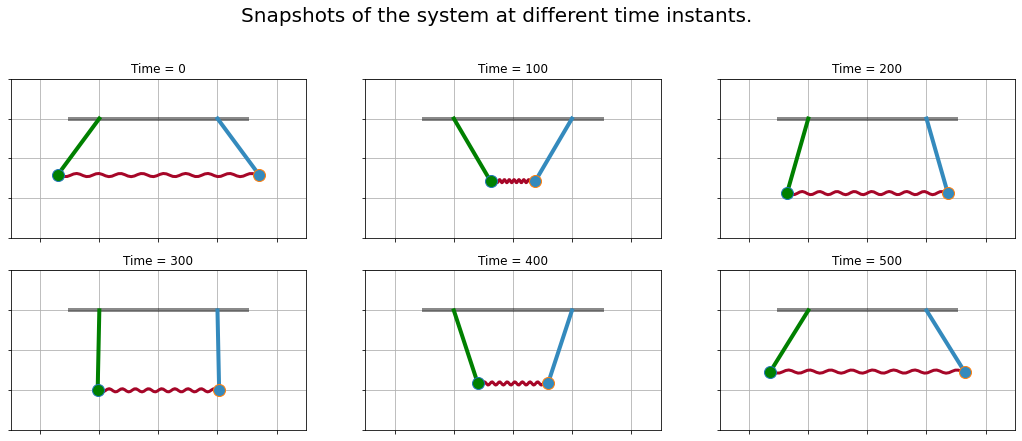

In [9]:
# Simulation of Coupled Pendulum
#               : Needs odespy for integration
import numpy as np
from numpy import pi
import odespy
import scipy.io as sio

m1, m2 = 1, 1     # masses of pendulums
l1, l2 = 1, 1     # lengths of pendulums
k, g  = 1, 9.8
dydx = np.zeros((4))		#size of array 4 with all elements zero

def CoupledPendulum(rp, t):

    dydx[0] = rp[2]
    dydx[1] = rp[3]
    
    dydx[2] = ( np.sin(rp[0])*(m1*(l1*rp[0]**2-g)-k*l1)+k*l2*np.sin(rp[1]))/(m1*l1*np.cos(rp[0]))
    dydx[3] = ( np.sin(rp[1])*(m2*(l2*rp[1]**2-g)-k*l2)+k*l1*np.sin(rp[0]))/(m2*l2*np.cos(rp[1]))
    
    return dydx


# Setting the initial condition
rp0 = np.zeros((4))     # initial \thetas and angular velocities
rp0[1] = pi/4
rp0[0] = -pi/4
#rp0[2] = 5*pi/2
#rp0[3] = 2

## odespy has been used to integrate the equation
T = 10				    # end of simulation
N = 1000 				# no of time steps
time_points = np.linspace(0, T, N+1)
solver = odespy.RK4(CoupledPendulum)
solver.set_initial_condition(rp0)
u, t = solver.solve(time_points)


f = plt.figure(figsize=(18, 10))
fr = 1

for i in [0, 100, 200, 300, 400, 500 ]: 
    sp = f.add_subplot(3, 3, fr )
    fr = fr + 1
    x1 = -1 + np.sin(u[i, 0])
    y1 = -np.cos(u[i, 0])
    x2 = 1  + np.sin(u[i, 1])
    y2 = -np.cos(u[i, 1])
    p1x = np.array([-1, x1])
    p1y = np.array([0, y1])
    p2x = np.array([1, x2])
    p2y = np.array([0, y2])
    spx = np.linspace(x1, x2, 64)#np.array([x1, x2])
    spy = (np.linspace(y1, y2, 64))#np.array([y1, y2])
    axis([-2.5, 2.5, -1.5, 0.5])
    sx = np.array([-1.5, 1.5])
    sy = np.array([0, 0])   
    plot(sx, sy, 'k', linewidth=4.0, alpha=0.46 )
    plot(spx, spy + 0.02*np.sin(58*spx/(x2-x1)),color='#A60628', linewidth=3.0, alpha=1)
    plot(p1x, p1y, 'g', linewidth=4.0 )
    plot(x1, y1, marker='o', markerfacecolor='green', markersize=12) 
    plot(p2x, p2y, color="#348ABD", linewidth=4.0 )
    plot(x2, y2,  marker='o', markerfacecolor="#348ABD", markersize=12)
    grid(True) 
    title('Time = %d'%(i))
    setp(sp.get_xticklabels(), visible=False)
    setp(sp.get_yticklabels(), visible=False)

suptitle("Snapshots of the system at different time instants.",fontsize=20);

We can create .gif file of these .png files by following command on terminal, 

**convert -delay 10 -loop 0 *.png double-pendulum.gif**

The .gif file of coupled-pendulum can be seen [here](https://github.com/rajeshrinet/compPhy/tree/master/notebooks/2014/plots/coupled-pendulum.gif).


The same cane done for the double-pendulum. The .gif in this case can be seen [here](https://github.com/rajeshrinet/compPhy/tree/master/notebooks/2014/plots/double-pendulum.gif).